# Week 5: Neural Network

### What's on this week
1. [Resuming from week 4](#resume)
2. [Building your first neural network model](#build)
3. [Understanding your neural network model](#viz)
4. [Finding optimal hyperparameters with GridSearchCV](#gridsearch)
5. [Feature selection](#fselect)
6. [Comparing each model](#comparison)

---

The practical note for this week introduces you to neural network mining in Python, particularly using multilayer perceptron classifier. Neural networks are a class of predictive models that mimic the structure of human brain. It consists of layers of neurons, each consuming outputs from the previous layers as inputs. Neural network is the most complex model out of everything that we have used so far.

**This tutorial notes is in experimental version. Please give us feedbacks and suggestions on how to make it better. Ask your tutor for any question and clarification.**

## 1. Resuming from week 4<a name="resume"></a>
Last week, we learned how to perform data mining with decision trees in Python. For this week, we will again reuse the code for data preprocessing. Just as regression models, neural networks are sensitive to skewed data, thus we also need to perform standarization on the dataset:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler

# preprocessing step
df = data_prep()

# train test split
y = df['TargetB']
X = df.drop(['TargetB'], axis=1)
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.5, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

## 2. Building your first neural network model

Start by importing your neural network from the library. As mentioned in the previous week, we are performing classification on this dataset. In `sklearn`, a neural network that can do that is `MLPClassifier`, short of multi-layer perceptron classifier.

In [2]:
from sklearn.neural_network import MLPClassifier

Let's train our first MLPClassifier. Initiate the model and see the score it gives you.

In [3]:
model = MLPClassifier()
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print(model)

Train accuracy: 0.928763163329
Test accuracy: 0.535618418336
             precision    recall  f1-score   support

          0       0.54      0.54      0.54      2422
          1       0.54      0.53      0.53      2421

avg / total       0.54      0.54      0.54      4843

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


/home/hendi/Documents/Tutoring/dataminingtutorials/my_env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Our first neural network did pretty okay, with 0.525 accuracy score on the test data. However, we got a warning message from the neural network, saying convergence is not reached. This means we have to increase the number of max iterations from the original value of 200.

Try to increase the `max_iter` to 500.

In [4]:
model = MLPClassifier(max_iter=500)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print(model)

Train accuracy: 0.913896345241
Test accuracy: 0.528804460045
             precision    recall  f1-score   support

          0       0.53      0.55      0.54      2422
          1       0.53      0.51      0.52      2421

avg / total       0.53      0.53      0.53      4843

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


With 500 max iterations, we managed to reach convergence. Let's keep this value. You can set up the max iter value higher to guarantee convergence everytime, at cost of slower training process.

## 4. Finding optimal hyperparameter with GridSearchCV

Once we have trained our first neural network, we should tune it to increase its performance using GridSearchCV. Neural network is one of the hardest model to tune due to its relatively high number of parameters and slow training process. For this tutorial, let's focus on tuning two parameters:
1. `hidden_layer_sizes`: It has values of tuples, and within each tuple, element i-th represent the number of neurons contained in each hidden layer.
2. `alpha`: L2 regularization parameter.

Firstly, let's start by tuning the hidden layer sizes. There is no official guideline on how many neurons we should have in each layer, but for most cases it is sufficient to have a single hidden layer with neurons count between number of features (input variables) and output neurons (in this case, it is 2).

Let's see how many input features we have.

In [5]:
print(X_train.shape)

(4843, 85)


With 85 features, let's start tuning with neuron count from 5 to 85, increment of 25. (This is going to be slow).

In [6]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 25)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.651455709271
Test accuracy: 0.544703696056
             precision    recall  f1-score   support

          0       0.55      0.52      0.53      2422
          1       0.54      0.57      0.56      2421

avg / total       0.54      0.54      0.54      4843

{'hidden_layer_sizes': (5,)}


It seems like the more neurons you have in your hidden layer, the model tends to overfit more. Try to tune around the lower neuron count.

In [7]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.620689655172
Test accuracy: 0.546975015486
             precision    recall  f1-score   support

          0       0.54      0.64      0.58      2422
          1       0.56      0.46      0.50      2421

avg / total       0.55      0.55      0.54      4843

{'hidden_layer_sizes': (3,)}


It seems like we have our answer for the neuron count. Now, let's try to tune `alpha`. The default value is `0.0001`, thus let's try to tune around it.

In [8]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.627916580632
Test accuracy: 0.543671278133
             precision    recall  f1-score   support

          0       0.54      0.57      0.55      2422
          1       0.55      0.52      0.53      2421

avg / total       0.54      0.54      0.54      4843

{'hidden_layer_sizes': (5,), 'alpha': 0.01}


## 5. Dimensionality reduction

Now, let's try to reduce the size of our feature set and see whether it improves the performance of the model. We will use the same techniques as covered last week.

### 5.1. Recursive Feature Elimination

Use LogisticRegression as the base elimination model.

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

19


In [10]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=1000), cv=10, n_jobs=-1)
cv.fit(X_train_rfe, y_train)

print("Train accuracy:", cv.score(X_train_rfe, y_train))
print("Test accuracy:", cv.score(X_test_rfe, y_test))

y_pred = cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.59611810861
Test accuracy: 0.565971505265
             precision    recall  f1-score   support

          0       0.56      0.62      0.59      2422
          1       0.57      0.51      0.54      2421

avg / total       0.57      0.57      0.56      4843

{'hidden_layer_sizes': (7,), 'alpha': 0.0001}


In [11]:
from sklearn.tree import DecisionTreeClassifier

rfe = RFECV(estimator = DecisionTreeClassifier(), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

29


In [12]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=1000), cv=10, n_jobs=-1)
cv.fit(X_train_rfe, y_train)

print("Train accuracy:", cv.score(X_train_rfe, y_train))
print("Test accuracy:", cv.score(X_test_rfe, y_test))

y_pred = cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.600660747471
Test accuracy: 0.563080735082
             precision    recall  f1-score   support

          0       0.55      0.70      0.62      2422
          1       0.59      0.43      0.49      2421

avg / total       0.57      0.56      0.55      4843

{'hidden_layer_sizes': (3,), 'alpha': 0.001}


### 5.2. Principle Component Analysis

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

sum_var = 0
for idx, val in enumerate(pca.explained_variance_ratio_):
    sum_var += val
    if (sum_var >= 0.95):
        print("N components with > 95% variance =", idx+1)
        break

N components with > 95% variance = 66


In [14]:
pca = PCA(n_components=66)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=1000), cv=10, n_jobs=-1)
cv.fit(X_train_pca, y_train)

print("Train accuracy:", cv.score(X_train_pca, y_train))
print("Test accuracy:", cv.score(X_test_pca, y_test))

y_pred = cv.predict(X_test_pca)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.614082180467
Test accuracy: 0.544910179641
             precision    recall  f1-score   support

          0       0.54      0.55      0.55      2422
          1       0.55      0.54      0.54      2421

avg / total       0.54      0.54      0.54      4843

{'hidden_layer_sizes': (7,), 'alpha': 0.01}


### 5.3. Selecting using decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 10),
          'min_samples_leaf': range(20, 200, 20)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(), cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(3, 10), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(20, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(cv.best_estimator_, X.columns)

GiftAvgLast : 0.424147866229
DemMedHomeValue : 0.165964132384
GiftTimeLast : 0.148495742668
GiftAvgCard36 : 0.0996893965541
DemAge : 0.0654544865005
PromCntCard36 : 0.0494236862349
GiftCntAll : 0.0468246894295
DemGender_U : 0.0
DemCluster_11 : 0.0
StatusCat96NK_N : 0.0
StatusCat96NK_S : 0.0
DemCluster_0 : 0.0
DemCluster_1 : 0.0
DemCluster_10 : 0.0
DemCluster_13 : 0.0
DemCluster_12 : 0.0
StatusCat96NK_F : 0.0
DemCluster_14 : 0.0
DemCluster_15 : 0.0
DemCluster_16 : 0.0


In [17]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(4843, 7)


In [18]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=1000), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv.score(X_train_sel_model, y_train))
print("Test accuracy:", cv.score(X_test_sel_model, y_test))

y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.578979971092
Test accuracy: 0.576915135247
             precision    recall  f1-score   support

          0       0.58      0.59      0.58      2422
          1       0.58      0.57      0.57      2421

avg / total       0.58      0.58      0.58      4843

{'hidden_layer_sizes': (9,), 'alpha': 0.0001}


## 6. Comparing Models

Models

In [19]:
# grid search CV for decision tree
params = {'criterion': ['gini'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(40, 61, 5)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(), cv=10)
cv.fit(X_train, y_train)

dt_model = cv.best_estimator_
print(dt_model)

# grid search CV for logistic regression
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

log_reg_model = cv.best_estimator_
print(log_reg_model)

# grid search CV for NN
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

nn_model = cv.best_estimator_
print(nn_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_sta

### Metrics that we can use

Accuracy

In [20]:
y_pred_dt = dt_model.predict(X_test)
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

print("Accuracy score on test for DT:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for logistic regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy score on test for NN:", accuracy_score(y_test, y_pred_nn))

Accuracy score on test for DT: 0.567210406773
Accuracy score on test for logistic regression: 0.569275242618
Accuracy score on test for NN: 0.556060293207


ROC AUC score

In [21]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = dt_model.predict_proba(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)
y_pred_proba_nn = nn_model.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])

print("ROC index on test for DT:", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN:", roc_index_nn)

ROC index on test for DT: 0.577610714942
ROC index on test for logistic regression: 0.595601520006
ROC index on test for NN: 0.572550395981


In [22]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:,1])

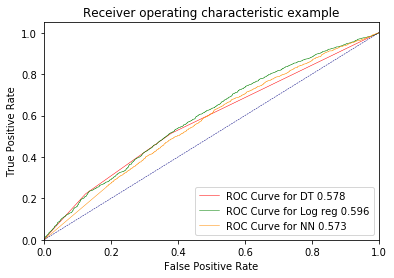

In [26]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg, label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg), color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn), color='darkorange', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()